# SIT742: Modern Data Science 
**(2021 Assessment Task 02 - Data Analytics)**

---
- Please refer to the CloudDeakin for the detailed assessment requirements.
- Please submit to Clouddeakin before the due date.
- It is a group assignment, and please form a group and self-enrol into the CloudDeakin groups.
- Students with difficulty in meeting the deadline because of illness, etc. must apply for an assignment extension in CloudDeakin no later than *12:00pm on 21/05/2021 (Friday)*.


Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your group information in the following cell.   
</div>

**Student Information:** Please fill your group information below

- Group ID:
- Names:  
- Student IDs:  
- Emails:  
- Lab Session and Tutor (for on campus students): 

---


# Part I - Web Log Data

## Overview

Hotel TULIP a five-star hotel located at Deakin University, and its CIO Dr Bear Guts has asked the Team-SIT742 team to analyse the weblogs files. Hence, Hotel TULIP would like you *Group-SIT742* (a hypothetical data analytics group with up to 3 data analysers) to analyse web log files and discover user accessing patterns of different web pages. 

In this part, you are required to use give dataset to finish some required analysis, with the exploreation data analytics skills as well as visuilization skill.


You will be required to complete the coding to answer the questions with a neat and clean format, and you must keep outputs for code. Your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not restricted to the partial code provided, and you can write your own code to implement the required tasks. But you should provide sufficient comments.


## 1.Data ETL

### 1.1 Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from ipywidgets import IntProgress
import pandas as pd
from IPython.display import display
from zipfile import ZipFile
from pathlib import Path


# Your file might be in a different location, so you need to customize the path. If the files already exists athe loop passes

##using Modern Data Science directory'''

all_files = ZipFile('/content/drive/MyDrive/Modern Data Science/HTWebLog_p1.zip', 'r')
files = all_files.namelist()
#Define list to store data
data = []
##Extract the zipped log files to a directory
import zipfile
import os

target_location = r'/content/drive/MyDrive/Modern Data Science/data science/data'
target_zip = r'/content/drive/MyDrive/Modern Data Science/HTWebLog_p1.zip'

with zipfile.ZipFile(target_zip) as zip_file:
    for member in zip_file.namelist():
        if os.path.exists(target_location + r'/' + member) or os.path.isfile(target_location + r'/' + member):
            pass
        else:
            zip_file.extract(member, target_location)


# Column names to be added later
ColumnNames = ['date','time','s_sitename','s_ip','cs_method','cs_uri_stem','cs_uri_query','s_port','cs_username',
             'c_ip','cs(User_Agent)','cs(Referer)','sc_status','sc_substatus','sc_win32_status']

#Define data path
folder = Path("/content/drive/MyDrive/Modern Data Science/data science/data")
#Import the data and join into a single dataframe
df_ht = pd.concat([
    pd.read_csv(files, header=None, delimiter= " ", error_bad_lines=False, encoding='ISO-8859-1',warn_bad_lines=False, comment='#')
    for files in folder.glob("*.log")
])

##Include column names
df_ht.columns = ColumnNames
#Overview of the first 10 rows
df_ht.head(10)

,date,time,s_sitename,s_ip,cs_method,cs_uri_stem,cs_uri_query,s_port,cs_username,c_ip,cs(User_Agent),cs(Referer),sc_status,sc_substatus,sc_win32_status
0,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.google.com/search?sourceid=navclien...,200.0,0.0,0.0
1,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,200.0,0.0,0.0
2,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
3,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
4,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_img.jpg,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
5,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_logo.gif,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
6,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/topmenu_reservation...,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
7,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/topmenu_contactus.gif,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
8,2006-11-01,00:00:10,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/topmenu_ja.gif,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
9,2006-11-01,00:00:10,W3SVC1,127.0.0.1,GET,/Tulip/common/images/top_bar.jpg,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0


In order to reduce the processing time, we will remove all missing values for data and only select 30% of total data for classification. 

**Code**: 
    1. Remove all NAs, for the columns, if the column is with 15% NAs, you need to remove that column. Then, for the rows, if there are any NAs in that row, you need to remove that row (requests)  
    2. select 30\% of the total data in to a new dataframe weblog_df.
    
    *Keep the outputs for code in your notebook.

**Report**:
    The number of requests in weblog\_df.


In [ ]:
#Import seaborn and matplotlib for visualization
import matplotlib.pyplot as plt
import seaborn as sns

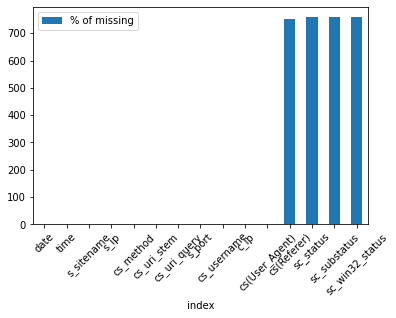

In [ ]:
#Your code to remove missing values as required.
#Count the number of missing observations per column
percent_missing = df_ht.isnull().sum() * 100 / len(df_ht)
miss_df = pd.DataFrame({'Attribute': df_ht.columns,'Number of missing observations': df_ht.isnull().sum(),
                                 '% of missing': percent_missing}, index = None)
miss_df.sort_values('% of missing', inplace=True)
miss_df = miss_df.reset_index()
miss_df = miss_df.drop('index', axis = 1)
miss_df

,Attribute,Number of missing observations,% of missing
0,date,2,0.000024
1,time,2,0.000024
2,s_sitename,2,0.000024
3,s_ip,2,0.000024
4,cs_method,2,0.000024
5,cs_uri_stem,2,0.000024
6,cs_uri_query,2,0.000024
7,s_port,2,0.000024
8,cs_username,2,0.000024
9,c_ip,2,0.000024


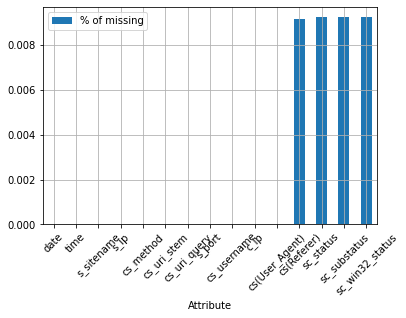

In [ ]:
miss_df.plot.bar(x='Attribute', y='% of missing', rot=45)
plt.grid()

In [ ]:
#drop all missing observations and retain all the columns as no variable had more than 15% missing observations
df_ht = df_ht.dropna()

In [ ]:
# select 30% of the data for further use
weblog_df = df_ht.sample(frac = 0.3, random_state=1)

#Your code to show the number of requests in weblog_df
print("TNumber of requests in weblog_df = ", len(weblog_df))

TNumber of requests in weblog_df =  2467261


### 1.2 Feature Selection

**Code**: 
    You are required to select *'cs_method'*,*'c_ip'*,*'cs_uri_stem'*,*'cs(User_Agent)'* as input features  and 'sc_status' as class label into a new dataframe ml_df for following Machine Learning Tasks. 

*Keep the outputs for code in your notebook.

**Report**:
    1. Data Description of ml_df,  
    2. Print top 5 rows of ml_df.



In [ ]:
# Your code for feature selection
#Select the cs_method','c_ip','cs_uri_stem','cs(User_Agent)' as input features and 'sc_status' as class label features
ml_df = weblog_df[['cs_method','c_ip','cs_uri_stem','cs(User_Agent)', 'sc_status']]

#Your code to show the top 5 rows of ml_df
print('\n\nTop 5 observations:\n\n')
ml_df.head(5)



Top 5 observations:




,cs_method,c_ip,cs_uri_stem,cs(User_Agent),sc_status
14999,GET,202.126.216.5,/Tulip/common/zh-hk/images/sidebanner_2.jpg,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200.0
14322,GET,218.103.20.6,/Tulip/common/zh-hk/images/sidebanner_1.jpg,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200.0
27231,GET,121.35.50.185,/Tulip/common/en-us/images/sidebanner_11.jpg,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304.0
15125,GET,219.78.68.194,/Tulip/common/common_style.aspx,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200.0
5991,GET,203.198.226.102,/promotion/FP00207_2.jpg,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200.0


## 2.Unsupervised Learning
 You are required to complete this part only using **sklearn**.


**Code**: 
    1. Perform unsupervised learning on ml_df with K Means, with a varying K from 2 to 10;
    2. Plot in the elbow plot. 
    
    *Keep the outputs for code in your notebook.

**Report**:
    1. Figure 'KMeans' in the elbow plot, with a varying K from 2 to 10.



In [ ]:
from sklearn import preprocessing
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
#label endocingencoding 
le_df = ml_df.apply(preprocessing.LabelEncoder().fit_transform)

#Your code for Kmeans
#Define a k means instance and train several models by varying k between 2 and 10. This might take a while ~10 mins
# k means determine k
wcss = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(le_df)
    kmeanModel.fit(le_df)
    wcss.append(kmeanModel.inertia_)



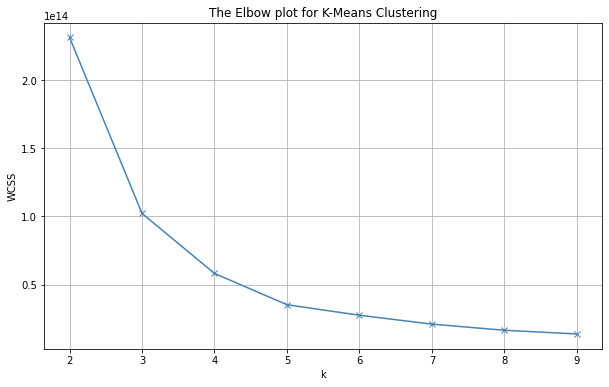

In [ ]:
# Plot the elbow
#Elbow plot
plt.figure(figsize = (10,6))
plt.plot(K, wcss, 'bx-', color = 'steelblue')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('The Elbow plot for K-Means Clustering')
plt.grid()
plt.show()

## 3.Supervised Learning
 You are required to complete this part only using **PySpark**.


In [ ]:
#Update local version of the package catalog t enable installation of related packages.
!apt update
# install Java8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# download spark 3.1.1
!wget -q http://apache.osuosl.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
# unzip it
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
# install findspark 
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

import findspark 
findspark.init() 

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [60.9 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/cran/

In [ ]:
from pyspark.sql import SparkSession 
from pyspark.sql.types import *
#Create spark instance
spark = SparkSession.builder.appName('Modern data science-App').getOrCreate()

### 3.1 Data Preparation 

In order to reduce the processing time, we will select 10% of le_df.

In [ ]:
schema = StructType([StructField("sc_status", IntegerType(), True),
                     StructField("cs_method", IntegerType(), True),
                     StructField("c_ip", IntegerType(), True),
                     StructField("cs_uri_stem", IntegerType(), True),
                     StructField("cs(User_Agent)", IntegerType(), True)])

sl_df = spark.createDataFrame(le_df, schema)

In [ ]:
#Only 10% of the data is used in this part.
sl_df = sl_df.sample(fraction=0.1, seed=1)

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
# Data transformer tranasformation
vector_assembler = VectorAssembler(inputCols=['cs_method', 'c_ip', 'cs_uri_stem', 'cs(User_Agent)'],outputCol="features")
df_temp = vector_assembler.transform(sl_df)
df_temp.show(3)

+---------+---------+----+-----------+--------------+--------------------+
|sc_status|cs_method|c_ip|cs_uri_stem|cs(User_Agent)|            features|
+---------+---------+----+-----------+--------------+--------------------+
|        0|    41957|1298|       1382|             0|[41957.0,1298.0,1...|
|        0|    20918|1873|       1525|             4|[20918.0,1873.0,1...|
|        0|    56286|1567|       1525|             4|[56286.0,1567.0,1...|
+---------+---------+----+-----------+--------------+--------------------+
only showing top 3 rows



In [ ]:
#Select the necessary attributes and output the top 3 rows of the resulting data
df_sl = df_temp.drop('cs_method', 'c_ip', 'cs_uri_stem', 'cs(User_Agent)')
df_sl.show(3)

+---------+--------------------+
|sc_status|            features|
+---------+--------------------+
|        0|[41957.0,1298.0,1...|
|        0|[20918.0,1873.0,1...|
|        0|[56286.0,1567.0,1...|
+---------+--------------------+
only showing top 3 rows



###  3.2 Decision Tree or Logistic Regression

 <div class="alert alert-block alert-info">

**Code**: 
    1. Perform supervised learning on ml\_df with Decision Tree or Logistic Regression,  <br>
    2. Evaluate the classification result using [confusion matrix ](https://en.wikipedia.org/wiki/Confusion_matrix) including TP, TN, FP, FN, <br>
    3. Evaluate the classification result using Precision, Recall and F1 score.
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1. Display the classification result using [confusion matrix ](https://en.wikipedia.org/wiki/Confusion_matrix) including TP, TN, FP, FN, <br>
    2. Display the classification result using Precision, Recall and F1 score.
</div>

In [ ]:
#Create the data sets for training and testing
(trainingData, testData) = df_sl.randomSplit([0.7, 0.3])

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Your code contains trainning from train data and predicting based on the test data

### Decision Tree

In [ ]:
#Create categorical numeric attributes
pd.options.mode.chained_assignment = None 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(ml_df["sc_status"])
ml_df["sc_status"] = list(le.transform(ml_df["sc_status"]))


le.fit(ml_df["c_ip"])
ml_df["c_ip"] = list(le.transform(ml_df["c_ip"]))


le.fit(ml_df["cs_uri_stem"])
ml_df["cs_uri_stem"] = le.transform(ml_df["cs_uri_stem"])


le.fit(ml_df["cs(User_Agent)"])
ml_df["cs(User_Agent)"] = le.transform(ml_df["cs(User_Agent)"])

le.fit(ml_df["cs_method"])
ml_df["cs_method"] = le.transform(ml_df["cs_method"])

#Create predictor and target features
X = ml_df.drop('sc_status', axis = 1)
y = ml_df['sc_status']


In [ ]:
#Train the model
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Split data to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=216)
#Decision tree fitting
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=216).fit(X_train, y_train)

#Evaluate the model performance using the test data
labels = y_test.unique()
predicted = clf.predict(X_test)
mcm = multilabel_confusion_matrix(y_test, predicted, labels=labels)
cm_pd = pd.DataFrame({'tn': mcm[:,0,0],'tp': mcm[:, 1, 1], 'fn': mcm[:, 1, 0],'fp': mcm[:, 0, 1]},index=labels)
print('\n\nConfusion Matrix:\n')
cm_pd.index.names = ['class']
cm_pd



Confusion Matrix:



,tn,tp,fn,fp
class,,,,
0,98877,368374,75083,74482
4,387083,84237,72455,73041
7,606212,10499,71,34
1,609190,2999,2263,2364
3,616199,463,91,63
9,616627,117,43,29
2,616771,30,9,6
5,616789,6,10,11
6,616752,40,14,10


In [46]:
print('====================Classification report====================\n',classification_report(y_test, predicted, zero_division = 1))

====================Classification report====================
               precision    recall  f1-score   support

           0       0.83      0.83      0.83    443457
           1       0.56      0.57      0.56      5262
           2       0.83      0.77      0.80        39
           3       0.88      0.84      0.86       554
           4       0.54      0.54      0.54    156692
           5       0.35      0.38      0.36        16
           6       0.80      0.74      0.77        54
           7       1.00      0.99      1.00     10570
           8       1.00      1.00      1.00         2
           9       0.80      0.73      0.76       160
          10       1.00      0.90      0.95        10

    accuracy                           0.76    616816
   macro avg       0.78      0.75      0.77    616816
weighted avg       0.76      0.76      0.76    616816



### 3.3 K-fold Cross-Validation
You are required to use K-fold cross validation to find out the best hyper-parameter set, where K = 2.
<div class="alert alert-block alert-info">

**Code**: 
Implement 2-fold cross validation for three (any three) classification models, where K = 2.
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1.  Your code design and running results, <br>
		2.  Your findings on hyper-parameters based on this cross-validation  results (Best results).
</div>

In [47]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# K = 2
# Your code for 2-fold cross validation
#Create the data sets for training and testing
(trainingData, testData) = df_sl.randomSplit([0.7, 0.3])
#Rename the target attribute
training =  trainingData.withColumnRenamed('sc_status', 'label')
testing = testData.withColumnRenamed('sc_status', 'label')

In [48]:
from pyspark.ml.classification import DecisionTreeClassifier
#Evaluation
#Cross validation
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.mllib.evaluation import  MulticlassMetrics
# Create initial Decision Tree Model
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features", maxDepth=3)

#ParamGrid for Cross Validation
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
dtparamGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [2, 5, 10, 20])
             .addGrid(dt.maxBins, [10, 20, 30, 40, 50])
             .build())

#2-fold CrossValidator
evaluator = MulticlassClassificationEvaluator()
cv = CrossValidator(estimator=dt, estimatorParamMaps=dtparamGrid, evaluator=evaluator, numFolds=2)

# Run on the trani data
cvModel = cv.fit(training)

In [49]:
# generate predictions on the test data
dtpredictions = cvModel.transform(testing)
#Best model performance
print('Accuracy:', evaluator.evaluate(dtpredictions))

Accuracy: 0.9989395354312777


In [50]:
# Make predictions
predictionAndTarget = cvModel.transform(testing).select("label", "prediction")
metrics_multi = MulticlassMetrics(predictionAndTarget.rdd.map(tuple))

In [51]:
#Output the parameters used for the best model
print('Optimal parameters', cvModel.bestModel) 

Optimal parameters DecisionTreeClassificationModel: uid=DecisionTreeClassifier_1dbfb66cc662, depth=10, numNodes=105, numClasses=5, numFeatures=4


In [70]:
#Create pandas dataframe for evaluation since   
predictions1 = predictionAndTarget.toPandas()
from sklearn.metrics import classification_report
#Test the model using the test data
labels = predictions1.label.unique()
mcm = multilabel_confusion_matrix(predictions1.label, predictions1.prediction, labels=labels)
cm_pd = pd.DataFrame({'tn': mcm[:,0,0],'tp': mcm[:, 1, 1], 'fn': mcm[:, 1, 0],'fp': mcm[:, 0, 1]},index=labels)
print('\n\nConfusion Matrix:\n')
cm_pd.index.names = ['class']
cm_pd



Confusion Matrix:



,tn,tp,fn,fp
class,,,,
0,51,73623,1,93
1,73704,0,64,0
2,73760,0,8,0
3,73697,50,20,1
5,73767,0,1,0
4,73767,1,0,0


In [73]:
#Output the Classification report
print('====================Classification report====================\n',classification_report(predictions1.label, predictions1.prediction, zero_division = 1))

====================Classification report====================
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     73624
           1       1.00      0.00      0.00        64
           2       1.00      0.00      0.00         8
           3       0.98      0.71      0.83        70
           4       1.00      1.00      1.00         1
           5       1.00      0.00      0.00         1

    accuracy                           1.00     73768
   macro avg       1.00      0.45      0.47     73768
weighted avg       1.00      1.00      1.00     73768



### Logistic Regression

In [54]:
# init log regression object 
lr = LogisticRegression(featuresCol='features', labelCol='label', maxIter=100) 

In [56]:
##Logistic Regression
paramGrid = (ParamGridBuilder()
.addGrid(lr.regParam, [0.1, 0.3]) # regularization parameter
.addGrid(lr.elasticNetParam, [0.0]) # Elastic Net Parameter (Ridge = 0)
.build())
from pyspark.ml.tuning import CrossValidator
# create cross validation object
crossval = CrossValidator(estimator=lr,
estimatorParamMaps=paramGrid,
evaluator=evaluator,
numFolds=5)
cvModel = crossval.fit(training)

In [57]:
# make predictions on test data
prediction_mul_lr = cvModel.transform(testing)

In [58]:
# Make prediction
predictionAndTarget = cvModel.transform(testing).select("label", "prediction")
print('Best performing parameters', cvModel.bestModel) 

Best performing parameters LogisticRegressionModel: uid=LogisticRegression_71c8a55152d9, numClasses=5, numFeatures=4


In [59]:
#Create pandas dataframe for evaluation since   
predictions1 = predictionAndTarget.toPandas()
from sklearn.metrics import classification_report
#Test the model using the test data
labels = predictions1.label.unique()
mcm = multilabel_confusion_matrix(predictions1.label, predictions1.prediction, labels=labels)
cm_pd = pd.DataFrame({'tn': mcm[:,0,0],'tp': mcm[:, 1, 1], 'fn': mcm[:, 1, 0],'fp': mcm[:, 0, 1]},index=labels)
print('\n\nConfusion Matrix:\n')
cm_pd.index.names = ['class']
cm_pd




Confusion Matrix:



,tn,tp,fn,fp
class,,,,
0,0,73624,0,144
1,73704,0,64,0
2,73760,0,8,0
3,73698,0,70,0
5,73767,0,1,0
4,73767,0,1,0


In [60]:
#Output the Classification report
print('\nClassification report Logistic Regression\n\n',classification_report(predictions1.label, predictions1.prediction, zero_division = 1))


Classification report Logistic Regression:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     73624
           1       1.00      0.00      0.00        64
           2       1.00      0.00      0.00         8
           3       1.00      0.00      0.00        70
           4       1.00      0.00      0.00         1
           5       1.00      0.00      0.00         1

    accuracy                           1.00     73768
   macro avg       1.00      0.17      0.17     73768
weighted avg       1.00      1.00      1.00     73768



### Random Forest Classifier

In [61]:
from pyspark.ml.classification import RandomForestClassifier
#RF
rf = RandomForestClassifier(labelCol="label", featuresCol="features")


# no parameter search
paramGrid = ParamGridBuilder().addGrid(rf.maxDepth, [2, 5, 10]).build()

# 2-fold cross validation
crossval = CrossValidator(
    estimator=rf, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=2)


cvModel = crossval.fit(training)


In [62]:
# Make prediction
predictionAndTarget = cvModel.transform(testing).select("label", "prediction")
print('Best performing parameters', cvModel.bestModel) 

Best performing parameters RandomForestClassificationModel: uid=RandomForestClassifier_cdbe0dedd4a8, numTrees=20, numClasses=5, numFeatures=4


In [63]:
#Create pandas dataframe for evaluation since   
predictions1 = predictionAndTarget.toPandas()
from sklearn.metrics import classification_report
#Test the model using the test data
labels = predictions1.label.unique()
mcm = multilabel_confusion_matrix(predictions1.label, predictions1.prediction, labels=labels)
cm_pd = pd.DataFrame({'tn': mcm[:,0,0],'tp': mcm[:, 1, 1], 'fn': mcm[:, 1, 0],'fp': mcm[:, 0, 1]},index=labels)
print('\n\nConfusion Matrix:\n')
cm_pd.index.names = ['class']
cm_pd




Confusion Matrix:



,tn,tp,fn,fp
class,,,,
0,51,73623,1,93
1,73704,0,64,0
2,73760,0,8,0
3,73697,50,20,1
5,73767,0,1,0
4,73767,1,0,0


In [64]:
#Output the Classification report
print('\nClassification report Logistic Regression:\n\n',classification_report(predictions1.label, predictions1.prediction, zero_division = 1))


Classification report Logistic Regression:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     73624
           1       1.00      0.00      0.00        64
           2       1.00      0.00      0.00         8
           3       0.98      0.71      0.83        70
           4       1.00      1.00      1.00         1
           5       1.00      0.00      0.00         1

    accuracy                           1.00     73768
   macro avg       1.00      0.45      0.47     73768
weighted avg       1.00      1.00      1.00     73768



## 4.Association Rule Mining
<div class="alert alert-block alert-info">

**Code**: 
Implement association rule mining with a suitable threshold for support, and confidence 
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1.  Your code design and running results, <br>
		2.  Your findings on on ARMing results.
</div>

In [65]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp37-none-any.whl size=5975 sha256=856242c3b039ab2f1a2582f1fd2faf0cb8dcb7b08d497137ca24541995d90f0c
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [66]:
# you can also use PySpark package, if preferred
from apyori import apriori
dff = weblog_df[:100000]
# Your code
#Create transactions
transactions = []
#Create rules for the first 1000 transactions (creating transactions on the complete data takes >45 mins)
for i in range(0, 20):
    transactions.append([str(dff.values[i,j]) for j in range(0, len(dff.columns))])

In [74]:
#define the Apriori model.
#Define parameters
maximum_length = 2 # number of items per rule
support_minimum = 0.01
confidence = 0.1
rules = apriori(transactions, min_support = support_minimum, min_confidence = 0.1, min_lift = 10, max_length = maximum_length)
#create associations
associations = list(rules)


In [80]:
rules_df = pd.DataFrame(associations)
support = rules_df.support

first_values = []
second_values = []
third_values = []


# loop number of rows time and append 1 by 1 value in a separate list.. first and second element was frozenset which need to be converted in list..
for i in range(rules_df.shape[0]):
    single_list = rules_df['ordered_statistics'][i][0]
    first_values.append(list(single_list[0]))
    second_values.append(list(single_list[1]))
    third_values.append(single_list[2])
  
#convert all four list into dataframe for further operation..
lhs = pd.DataFrame(first_values)
rhs= pd.DataFrame(second_values)
lhs.columns = ['lhs']
rhs.columns = ['rhs']
confidance=pd.DataFrame(third_values,columns=['Confidence'])

#concat all list together in a single dataframe
df_final = pd.concat([lhs,rhs,support,confidance], axis=1)
print('Top 10 rules sorted by support')
df_final.sort_values('support', ascending = False).head(10)

Top 10 rules sorted by confidence


,lhs,rhs,support,Confidence
0,/Tulip/aboutus/zh-hk/aboutus_location.aspx,05:58:11,0.05,1.0
149,2006-11-01,203.34.154.24,0.05,0.5
138,14:30:08,2006-12-26,0.05,1.0
139,14:30:08,203.223.228.159,0.05,1.0
140,14:30:08,http://www.hotelTulip.com.hk/Tulip/whatsnew/wh...,0.05,1.0
141,16:33:18,2006-11-12,0.05,1.0
142,17:13:48,2006-11-04,0.05,1.0
143,17:13:48,84.191.55.121,0.05,1.0
144,17:13:48,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,0.05,1.0
145,17:13:48,http://www.hotelTulip.com.hk/Tulip/contactus/c...,0.05,1.0


In [77]:
print('Number of rules generated = ',len(associations))

Number of rules generated =  218


# Part II - Web Crawling

## Overview
In 2021, 
to better introduce and understand the research works on the professors,
Deakin university wants to perform the citation prediction on individual professor level.
You are required to implement a web crawler to crawl the *citation* information 
for A/Professor Gang Li from 2003 to 2021 (start at 2003 and end at 2021),
and also conduct several prediction coding tasks. 
You will need to make sure that 
the web crawling code and prediction code meets the requirements.
You are free to use any **Python** package for Web crawling and prediction 
by finishing below tasks.  


## 5.Crawl Gang Li citation information from 2003 to 2021

 <div class="alert alert-block alert-info">

**Code**: 
    You are required to write the code to generate the csv for Gang Li's citation from 2003 to 2021
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [81]:
# Your code to crawl and generate the csv, and save it to variable create_df
#import pandas as pd
#Install the packages that will be used for scraping
!pip install selenium
##Important to ensure chromium works in google colab
!apt-get update 
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin



     |████████████████████████████████| 911kB 6.9MB/s 
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports I

In [82]:
#Import required packages
import sys
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup

In [84]:
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://scholar.google.com/citations?user=dqwjm-0AAAAJ")
python_button = wd.find_element_by_xpath('//*[@id="gsc_bpf_more"]')
python_button.click()
s = BeautifulSoup(wd.page_source, "html.parser")
year = list(map(str, [i.text for i in s.find_all('span', {'class': 'gsc_a_h gsc_a_hc gs_ibl'})])) ##string not int because some are ''
paper = list(map(str, [i.text for i in s.find_all('a', {'class': 'gsc_a_at'})]))
citations = list(map(int, [i.text for i in s.find_all('span', {'class':'gsc_g_al'})]))
years = list(map(int, [i.text for i in s.find_all('span', {'class':'gsc_g_t'})]))
#create_df = pd.DataFrame()
create_df = pd.DataFrame({'year': years, 'Citation': citations})
create_df.to_csv('drive/MyDrive/Modern Data Science/Citation2003-2021.csv', index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: use options instead of chrome_options
  import sys


## 6.Train Arima to predict the 2018 to 2020 citation

### 6.1 Train Arima Model
 <div class="alert alert-block alert-info">

**Code**: 
    You will need to use the create_df and then perform the
Arima training with parameter of $p=1$, $q=1$ and $d=1$ on data from 2003 to 2017 (15 years)
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [85]:
# your code to use create_df to split the data into train (year 2003 to 2017) and test
#Train
train = create_df[create_df['year']>= 2003]
train = create_df[(create_df['year']>= 2003) & (create_df['year'] <= 2017)]
train = train.set_index('year')
#Test
test = create_df[(create_df['year']> 2017) & (create_df['year'] <= 2020)]
test = test.set_index('year')
test

,Citation
year,
2018,454
2019,583
2020,846


In [86]:
train

,Citation
year,
2003,15
2004,34
2005,17
2006,11
2007,33
2008,41
2009,57
2010,68
2011,106


### 6.2 Predicting the citation and Calculate the RMSE
 <div class="alert alert-block alert-info">

**Code**: 
    you will need to use the trained Arime model to predict the citation on year 2018, 2019 and 2020.
You will need to perform the evaluation by comparing the predicted citation from 2018 to 2020 with 
the true citation from 2018 to 2020 and calculate the RMSE (root mean square error).
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [88]:
import warnings
warnings.filterwarnings('ignore')
# your code to predict the citation and save it to variable preds. You may need to output the confidence interval(95%) here as well
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
df_log = np.log(train)
model= SARIMAX(train,order=(1,1,1))
#Fit the model
model=model.fit()

In [89]:
#Model summary
print(model.summary())

                           Statespace Model Results                           
Dep. Variable:               Citation   No. Observations:                   15
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -62.593
Date:                Wed, 02 Jun 2021   AIC                            131.185
Time:                        09:26:54   BIC                            133.102
Sample:                             0   HQIC                           131.008
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9464      0.269      3.521      0.000       0.420       1.473
ma.L1         -0.4768      0.733     -0.651      0.515      -1.912       0.959
sigma2       407.4338    162.538      2.507      0.0

In [99]:
# Print the error below by comparing the test and preds:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Your code to show the performance RMSE
import math
from sklearn.metrics import mean_squared_error
predictions = model.get_forecast(steps = 3).summary_frame()
test['Predictions'] = list(predictions['mean'])
print('RMSE of the resulting model:',round(math.sqrt(mean_squared_error(test.Citation, test.Predictions)),4))

RMSE of the resulting model: 1247.6879


### 6.3 Draw the visualization to compare

 <div class="alert alert-block alert-info">

**Code**: 
   You will also need to use matplotlib to draw the line plot with training data from 2013 to 2017,
the testing truth, the prediction and also the confidence interval (95%). 
    <br>
    *Keep the outputs for code in your notebook.
</div>

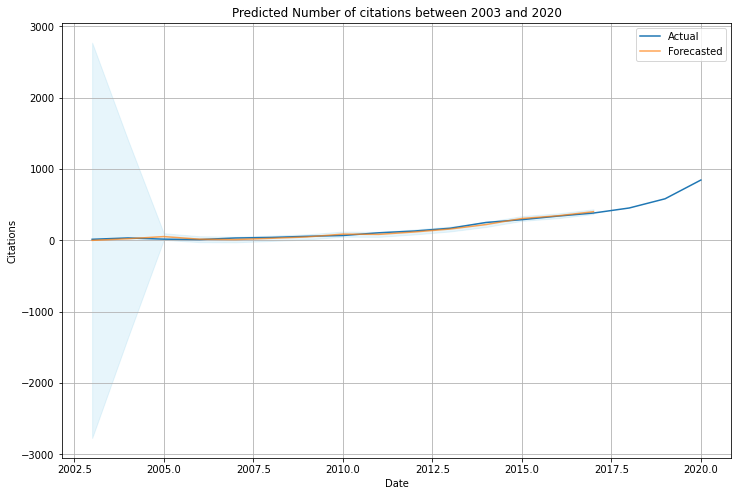

In [117]:
# Plot the points and the prediction with its confidence interval
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)

from matplotlib.ticker import FormatStrFormatter

# Generate the forecasts
forecastss = model.get_forecast(steps = 3).summary_frame()
pred = model.get_prediction( dynamic=False)
pred_ci = pred.conf_int()

ax = train.Citation.plot(label='Actual')
pred.predicted_mean.plot(ax=ax, label='Forecasted', alpha=.7, figsize=(12, 8))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='skyblue', alpha=.2)

plt.title('Predicted Number of citations between 2003 and 2020')
plt.xlabel('Date')
plt.ylabel('Citations')
plt.grid()
plt.legend()
plt.show()

## 7.Conduct the Grid Search with paramter selection and then predict the 2021 and 2022

### 7.1 Grid Search
 <div class="alert alert-block alert-info">

**Code**: 
  You will need to run the grid search for parameter $p=[1,2]$, 
$q=[1,2]$,
$d=[1,2]$
with training data on year 2003 to 2017 and testing data on 2018 to 2020
The result of the search on each paratemer combination (eg: p=1,q=1,d=1)
will need to be stored in the "search-results.csv",
The search-results.csv will have the column of "RMSE" and column "PARAMETER".
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [92]:
# your code to run grid search
#p = list(range(1,3))
#q = list(range(1,3))
#d = list(range(1,3))
#RMSE = []
#PARAMETER = []
import itertools

p = range(1, 3)
d = range(1,  3)
q = range(1, 3)
pdq = list(itertools.product(p, d, q))
parameters = []
RMSE = []
#For each parameter combination, fit the model
for param in pdq:
    mod = SARIMAX(train.Citation, order=param)
    model = mod.fit()
    predictions = model.get_forecast(steps = 3).summary_frame()
    # Make predictions
    test['Predictions'] = list(predictions['mean'])
    test['Predictions'] = test['Predictions'].astype('int64')
    test = round(test,0)
    out_ = math.sqrt(mean_squared_error(test.Citation, test.Predictions))
    parameters.append([param])
    RMSE.append(out_)

In [93]:
# your code to generate the seach-results.csv and print the top 6 rows
#Create results dataframe
results = pd.DataFrame(parameters,RMSE, columns = ['PARAMETER'])
results = results.reset_index()
results.columns = ['RMSE', 'PARAMETER']
results = results.sort_values('RMSE', ascending = True)
column_s = list(results.columns)
column_s = [column_s[-1]] + column_s[:-1]
results = results[column_s]
display(results.head(6))


,PARAMETER,RMSE
3,"(1, 2, 2)",186.150477
2,"(1, 2, 1)",198.254046
5,"(2, 1, 2)",206.496166
4,"(2, 1, 1)",211.412709
0,"(1, 1, 1)",212.144605
6,"(2, 2, 1)",213.655486


In [94]:
results.to_csv('drive/MyDrive/Modern Data Science/search-results.csv', index=False)

### 7.2 TRAIN With Best Parameter Set with data up to 2020 and Predict the 2021 and 2022

<div class="alert alert-block alert-info">

**Code**: 
  You will need to perform the training with Arima on data from 2003 to 2020 with best parameter you have found in last task,
and then conduct the prediction for year 2021 and 2022.
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [95]:
# your code to perform the Arima train on data 2003 to 2020
#train = create_df.citation_all.values[:-1]


# your code to perform the Arima train on data 2003 to 2020
#train = create_df.citation_all.values[:-1]
#Fit the ARIMA model with SARIMAX i.e. Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors model due to a stationarity error
import statsmodels.api as sm
#Train data
train = create_df[create_df['year']>= 2003]
train = train[train['year']<= 2020]
train = train.set_index('year')


arima_ = sm.tsa.SARIMAX(train.Citation, order = tuple(results.head(1).PARAMETER)[0], seasonal_order=(0,0,5,1)) #Use the best performing parameters
model = arima_.fit()
# summary of fit model
print('Coefficient Summary\n')
print(model.summary())
# Your code to predict for 2021 and 2022
#  produce two-step-ahead forecasts i.e. 2021 and 2022
forecastss = model.forecast(2)
# Print out the results
years = [2021, 2022]
res = pd.DataFrame(years)
res.columns = ['Year']
res['Forecast Citation'] = list(forecastss)
res['Forecast Citation'] = res['Forecast Citation'].astype('int')
print('\n\nForecasted citations for 2021 and 2022')
res


===================================Coefficient Summary===================================
                                 Statespace Model Results                                
Dep. Variable:                          Citation   No. Observations:                   18
Model:             SARIMAX(1, 2, 2)x(0, 0, 5, 1)   Log Likelihood                 -79.924
Date:                           Wed, 02 Jun 2021   AIC                            177.848
Time:                                   09:26:57   BIC                            184.801
Sample:                                        0   HQIC                           178.204
                                            - 18                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9869    581.315

,Year,Forecast Citation
0,2021,1244
1,2022,1786


<div class="alert alert-block alert-info">

**Code**: 
  You will also need to use matplotlib to draw the line plot with training data from 2013 to 2020, the prediction and also the confidence interval (95%).
    <br>
    *Keep the outputs for code in your notebook.
</div>

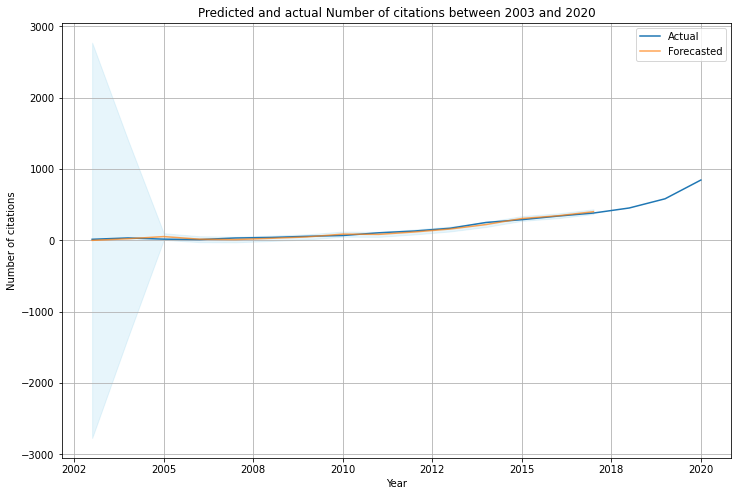

In [114]:
from matplotlib.ticker import FormatStrFormatter
# Plot the points and the prediction with its confidence interval
fig, ax = plt.subplots(figsize=(18, 10))

# Plot the data (here we are subsetting it to get a better look at the forecasts)



# Construct the forecasts
forecastss = model.get_forecast(steps = 3).summary_frame()
pred = model.get_prediction()
pred_ci = pred.conf_int()

ax = train.Citation.plot(label='Actual')
pred.predicted_mean.plot(ax=ax, label='Forecasted', alpha=.7, figsize=(12, 8))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='skyblue', alpha=.2)

plt.title('Predicted and actual Number of citations between 2003 and 2020')
plt.xlabel('Year')
plt.ylabel('Number of citations')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.grid()
plt.legend()
plt.show()

# Part III - Self-Reflective Essay

## Overview

Please check the assessment task specification details.
